In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image_filename = 'corgi.jpg'    #image need to be segmented
#download the model from
#https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
#or check the newest model from https://github.com/facebookresearch/segment-anything#model-checkpoints
sam_checkpoint = "sam_vit_h_4b8939.pth" 
model_type = "vit_h"

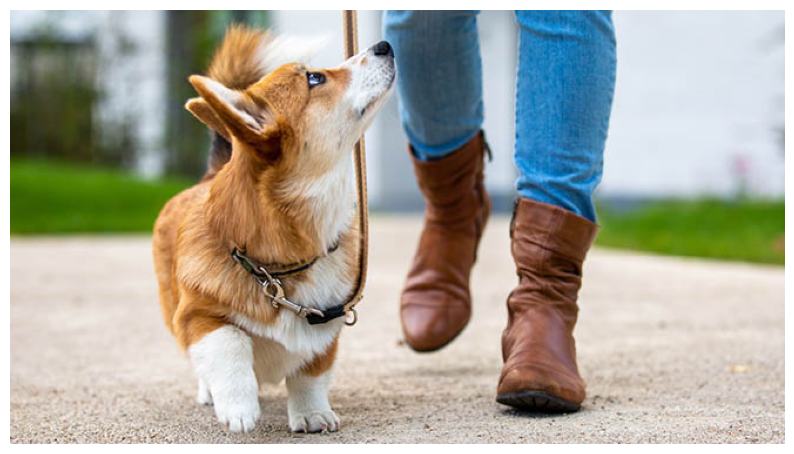

In [2]:
image = cv2.imread(image_filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#you can scale down your image size if segmentation takes too long
#image = cv2.resize(image, (image.shape[1]//4, image.shape[0]//4), interpolation=cv2.INTER_AREA)

#show the image 
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [3]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
#sam.to(device="cuda")  #enable this if you have an capable Nvidia Graphic card

In [4]:
#Segment using default values
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)
print('Image is segmented into %d objects' % len(masks))

Image is segmented into 39 objects


In [5]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

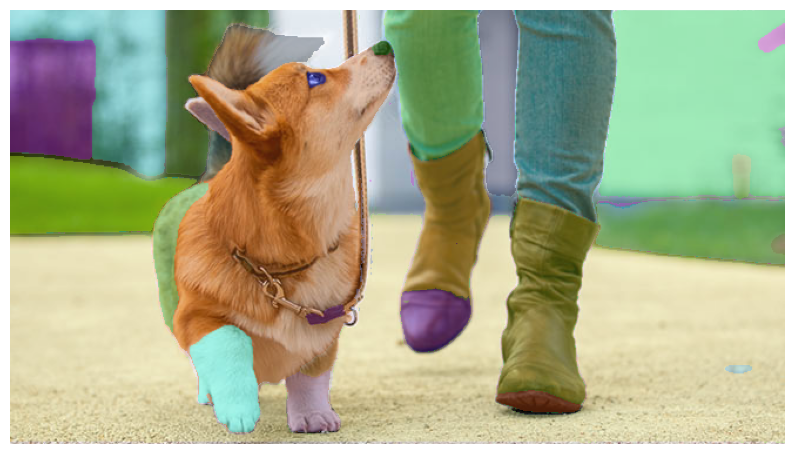

In [6]:
#show the segmentation
plt.figure(figsize=(10,10))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

In [7]:
#Segment using personalized values
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=10,
    pred_iou_thresh=0.99,
    stability_score_thresh=0.92,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=200,  # Requires open-cv to run post-processing
)

masks2 = mask_generator_2.generate(image)
print('Image is segmented into %d objects' % len(masks2))

Image is segmented into 10 objects


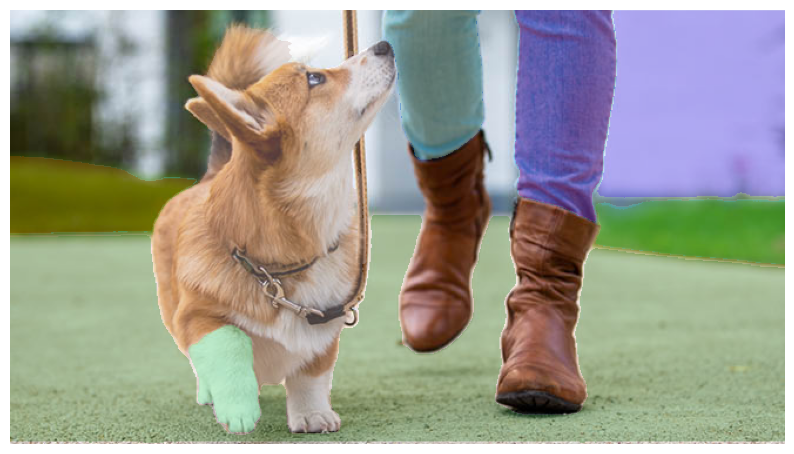

In [8]:
#show the segmentation
plt.figure(figsize=(10,10))
plt.imshow(image)
show_anns(masks2)
plt.axis('off')
plt.show() 